In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import json
# Suppress the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4642-792C

 Directory of C:\Users\Tester\ML27101\ML27101\Project About Love

06/14/2024  08:52 PM    <DIR>          .
06/14/2024  08:52 PM    <DIR>          ..
06/11/2024  09:54 AM    <DIR>          .ipynb_checkpoints
06/09/2024  09:55 PM            57,121 adaboost_model.pkl
06/14/2024  08:52 PM           423,305 Chanathip-Notebook.ipynb
06/08/2024  09:11 PM            19,192 divorce.csv
06/08/2024  09:11 PM            40,626 divorce.xlsx
06/13/2024  09:30 PM             2,961 Live_or_Love.py
06/08/2024  10:51 PM    <DIR>          pictures
06/09/2024  12:29 AM             3,934 questions.json
06/11/2024  09:34 AM                53 requirements.txt
06/11/2024  09:54 AM             9,315 Thai_questions.json
06/09/2024  12:28 AM             1,103 Untitled.ipynb
               9 File(s)        557,610 bytes
               4 Dir(s)  36,125,597,696 bytes free


In [7]:
df = pd.read_csv('./divorce.csv',delimiter=';')

In [8]:
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [9]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


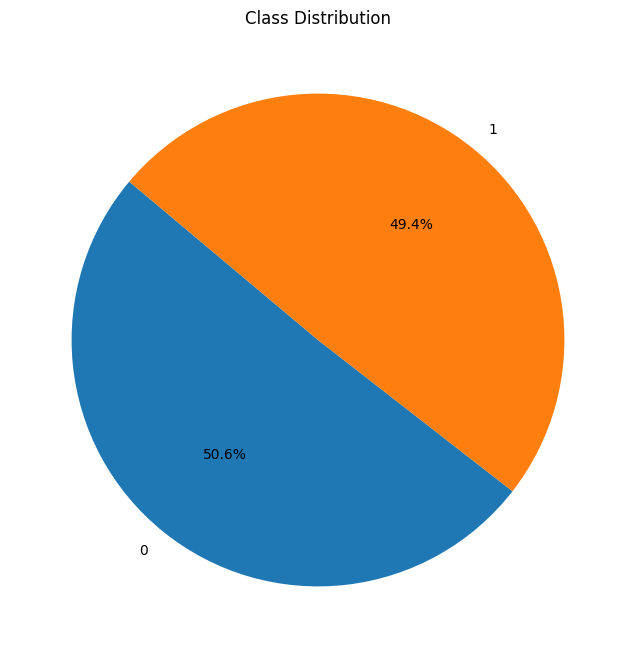

In [10]:
# Get value counts of the 'Class' column and convert to a list
class_counts = df['Class'].value_counts()

# Get unique labels
labels = class_counts.index

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Class Distribution')
plt.savefig(f'pictures/pie_chart.png')

# Display the pie chart
plt.show()

In [11]:
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


In [12]:
df.corr()['Class']

Atr1     0.861324
Atr2     0.820774
Atr3     0.806709
Atr4     0.819583
Atr5     0.893180
Atr6     0.420913
Atr7     0.544835
Atr8     0.869569
Atr9     0.912368
Atr10    0.834897
Atr11    0.918386
Atr12    0.868983
Atr13    0.844743
Atr14    0.864316
Atr15    0.901220
Atr16    0.886260
Atr17    0.929346
Atr18    0.923208
Atr19    0.928627
Atr20    0.907008
Atr21    0.864519
Atr22    0.825938
Atr23    0.837504
Atr24    0.839392
Atr25    0.857052
Atr26    0.872868
Atr27    0.869788
Atr28    0.846606
Atr29    0.892954
Atr30    0.874531
Atr31    0.792607
Atr32    0.829056
Atr33    0.861328
Atr34    0.835167
Atr35    0.862624
Atr36    0.886497
Atr37    0.863597
Atr38    0.883311
Atr39    0.896180
Atr40    0.938684
Atr41    0.894356
Atr42    0.739629
Atr43    0.566242
Atr44    0.847336
Atr45    0.546450
Atr46    0.443465
Atr47    0.656409
Atr48    0.619830
Atr49    0.740704
Atr50    0.755248
Atr51    0.692681
Atr52    0.651478
Atr53    0.711176
Atr54    0.806765
Class    1.000000
Name: Clas

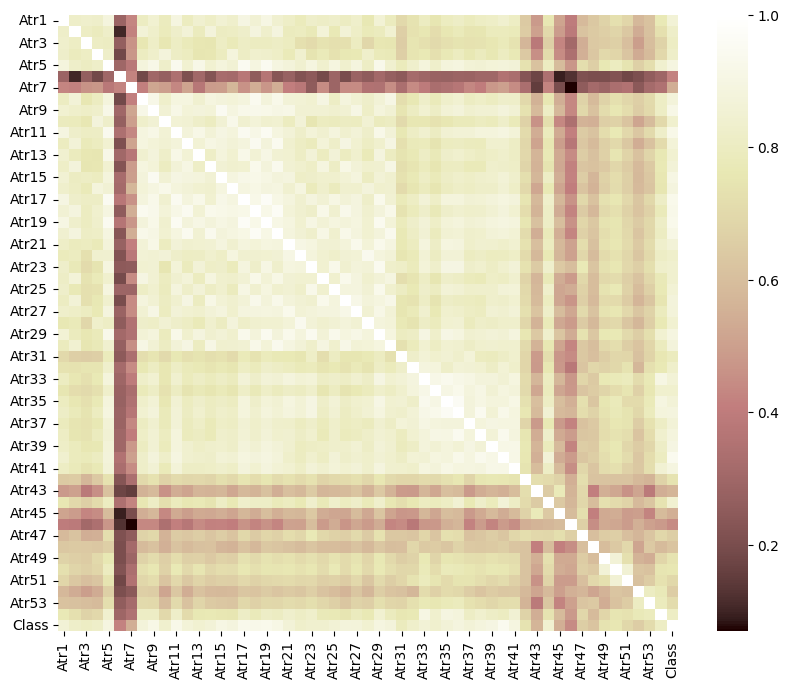

In [13]:
# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), fmt='.2f', cmap='pink', cbar=True)
plt.savefig(f'pictures/heatmap.png')

# แสดงผล
plt.show()

In [14]:
corr_matrix = df.corr()

# Select columns where correlation with 'Class' is less than 0.92
columns_to_drop = corr_matrix[corr_matrix['Class'] < 0.92].index

# Drop selected columns
df2 = df.drop(columns=columns_to_drop)

In [15]:
df2.head()

,Atr17,Atr18,Atr19,Atr40,Class
0,0,0,0,3,1
1,4,4,3,4,1
2,3,3,3,3,1
3,3,3,3,4,1
4,1,1,2,1,1


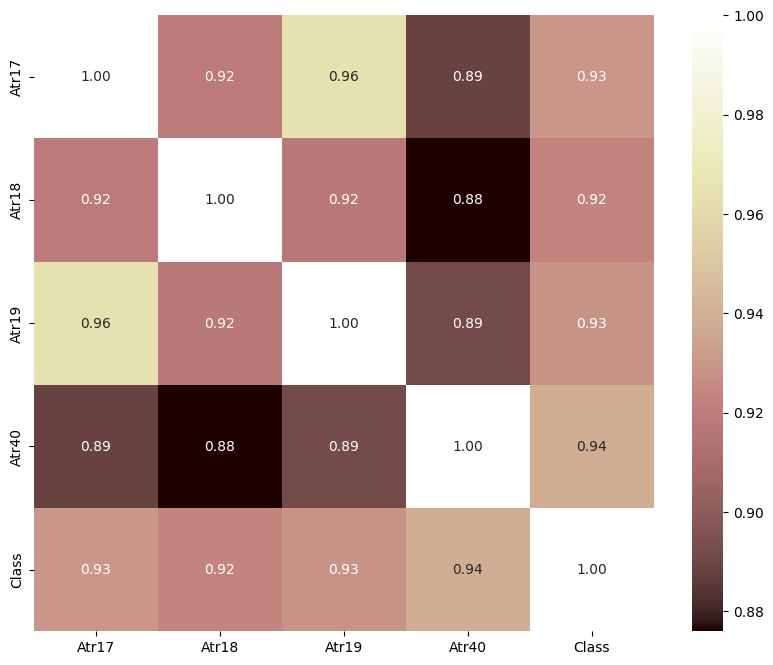

In [16]:
# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True, fmt='.2f', cmap='pink', cbar=True)
plt.savefig(f'pictures/heatmap_4best.png')
# แสดงผล
plt.show()

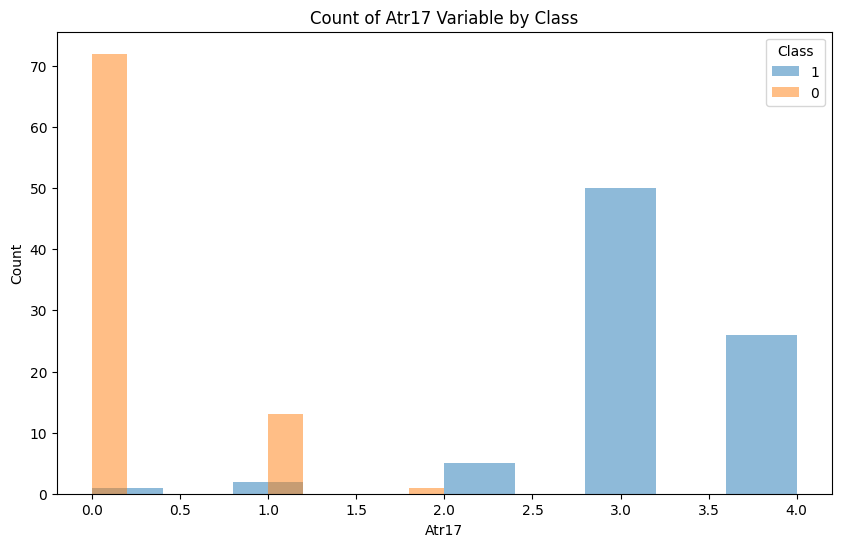

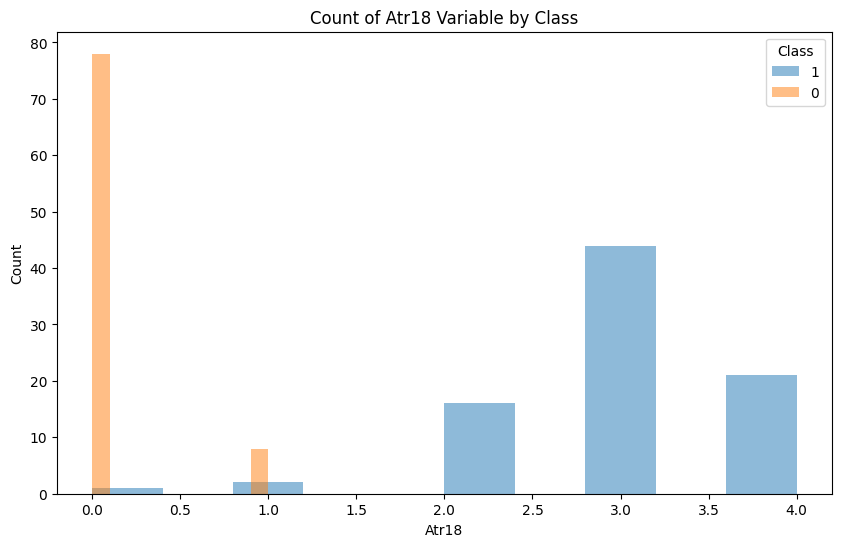

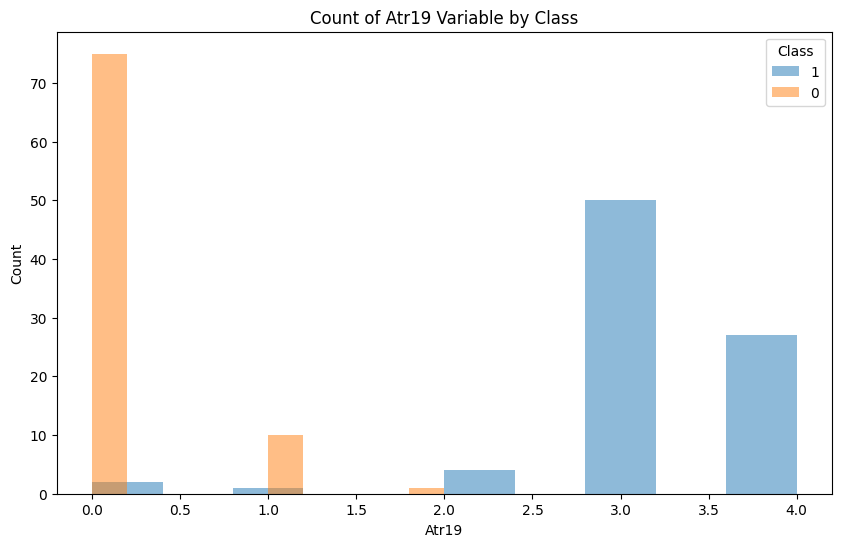

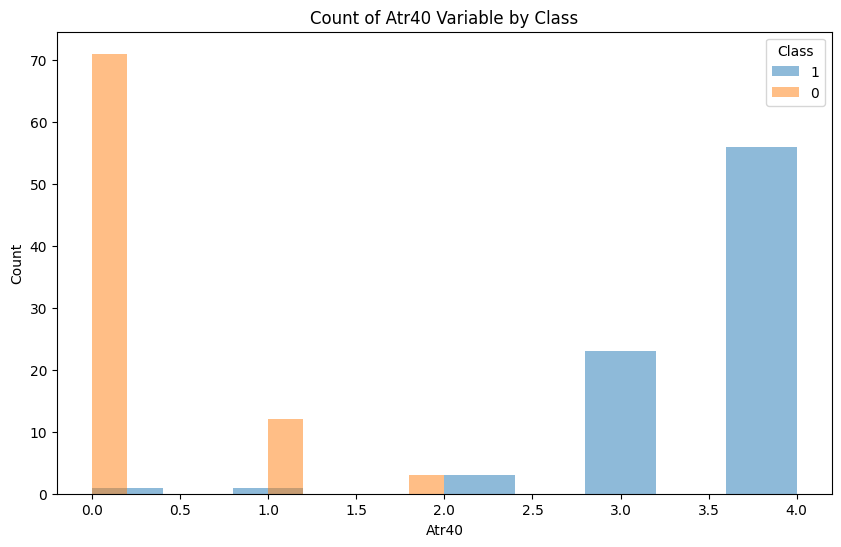

In [17]:
# Loop through all columns except the last one
for column in df2.columns[:-1]:
    plt.figure(figsize=(10, 6))
    for class_value in df2['Class'].unique():
        subset = df2[df2['Class'] == class_value]
        plt.hist(subset[column], bins=10, alpha=0.5, label=class_value)
    
    plt.title(f'Count of {column} Variable by Class')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.savefig(f'pictures/Histogram/{column}_histogram.png')
    plt.show()

In [18]:
# Making Copies To Be Used
df3=df2.copy()
df4=df2.copy()

In [19]:
# Add the Predicted_Class column (The One Line Code)
df3['Predicted_Class'] = df3['Atr18'].apply(lambda x: 0 if x in [0, 1] else 1)

# Filter misclassified rows and select relevant columns
misclassified_subset = df3[df3['Class'] != df3['Predicted_Class']][['Atr18', 'Class', 'Predicted_Class']]

# Print misclassified rows
print("Misclassified rows:")
print(misclassified_subset)

Misclassified rows:
   Atr18  Class  Predicted_Class
0      0      1                0
4      1      1                0
5      1      1                0


In [20]:
# Calculate the accuracy
accuracy = (df3['Class'] == df3['Predicted_Class']).mean() * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 98.24%


In [21]:
X = df.drop('Class',axis=1)
y = df['Class']

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Class, Length: 170, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state = 42,test_size=0.20)

## Model-1: AdaBoostClassifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators

# Train the model
adaboost.fit(X_train, y_train)



AdaBoostClassifier(n_estimators=100, random_state=42)

In [48]:
# Make predictions on the testing set
y_pred = adaboost.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


## Model-2: Logistic Regression

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
# Make predictions on the testing set
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

Accuracy (Gradient Boosting): 0.9411764705882353


## Model-3: Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [33]:
# Make predictions on the testing set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

Accuracy (Decision Tree): 0.9411764705882353


## Confusion Matrix:

In [28]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_pred = rf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14  0]
 [ 1 19]]


## Classification Report:

In [29]:
from sklearn.metrics import classification_report
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [59]:
import pickle

# บันทึกโมเดล AdaBoostClassifier เป็นไฟล์ .pkl
with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(adaboost, file)


In [58]:
AdaBoostClassifier

sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [57]:
import pickle

data_to_save = (AdaBoostClassifier)

Open a file in binary write mode
with open('adaboost_model.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

SyntaxError: invalid syntax (3596136515.py, line 5)

In [31]:
X.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54'],
      dtype='object')

## New Data

In [36]:
with open('questions.json', 'r') as file:
    questions = json.load(file)

In [48]:
questions

{'Atr1': 'When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.',
 'Atr2': 'I know we can ignore our differences, even if things get hard sometimes.',
 'Atr3': 'When we need it, we can take our discussions with my wife from the beginning and correct it.',
 'Atr4': 'When I argue with my wife, it will eventually work for me to contact him.',
 'Atr5': 'The time I spent with my wife is special for us.',
 'Atr6': "We don't have time at home as partners.",
 'Atr7': 'We are like two strangers who share the same environment at home rather than family.',
 'Atr8': 'I enjoy our holidays with my wife.',
 'Atr9': 'I enjoy traveling with my wife.',
 'Atr10': 'My wife and most of our goals are common.',
 'Atr11': 'I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other.',
 'Atr12': 'My wife and I have similar values in terms of personal freedom.',
 'Atr13': 'My husband and I have similar entert

In [32]:
# Get user input for each variable
x_new =  pd.DataFrame() 

In [50]:
for i, (atr_name, question) in enumerate(questions.items(), start=1):
    print(f'Question {i}: {question}')
    x_new[atr_name] = [2]
    print(x_new)


Question 1: When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.
   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0     2     2     2     2     2     2     2     2     2      2  ...      2   

   Atr46  Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  
0      2      2      2      2      2      2      2      2      2  

[1 rows x 54 columns]
Question 2: I know we can ignore our differences, even if things get hard sometimes.
   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0     2     2     2     2     2     2     2     2     2      2  ...      2   

   Atr46  Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  
0      2      2      2      2      2      2      2      2      2  

[1 rows x 54 columns]
Question 3: When we need it, we can take our discussions with my wife from the beginning and correct it.
   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10

In [54]:
y_pred_new = adaboost.predict(x_new)
result = y_pred_new
print('Result is:', result)


Result is: [1]


In [55]:
print(x_new)

   Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0     2     2     2     2     2     2     2     2     2      2  ...      2   

   Atr46  Atr47  Atr48  Atr49  Atr50  Atr51  Atr52  Atr53  Atr54  
0      2      2      2      2      2      2      2      2      2  

[1 rows x 54 columns]


In [56]:
x_new

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
